In [1]:
import rasterio


In [2]:
from rasterio.plot import show
import matplotlib.pyplot as plt

In [3]:
import geopandas as gpd

In [4]:
import os,glob2


In [39]:
##Initial stages (old way to open Rrs images)
path="F://feb_2_2019//"
Rrs442=rasterio.open(path+"Rrs442.tif")
Rrs492=rasterio.open("F://feb_2_2019//Rrs492.tif")
Rrs559=rasterio.open("F://feb_2_2019//Rrs559.tif")
Rrs665=rasterio.open("F://feb_2_2019//Rrs665.tif")
Rrs704=rasterio.open("F://feb_2_2019//Rrs704.tif")
Rrs739=rasterio.open("F://feb_2_2019//Rrs739.tif")
Rrs780=rasterio.open("F://feb_2_2019//Rrs780.tif")
Rrs=[Rrs442,Rrs492,Rrs559,Rrs665,Rrs704,Rrs739,Rrs780]

In [7]:
base_dir="F://feb_2_2019//"
Rrs_list=glob2.glob(base_dir+'Rrs*tif')
Rrs_list

['F://feb_2_2019\\Rrs442.tif',
 'F://feb_2_2019\\Rrs492.tif',
 'F://feb_2_2019\\Rrs559.tif',
 'F://feb_2_2019\\Rrs665.tif',
 'F://feb_2_2019\\Rrs704.tif',
 'F://feb_2_2019\\Rrs739.tif',
 'F://feb_2_2019\\Rrs780.tif']

F://feb_2_2019\Rrs442.tif


C:\Users\suchi\.conda\envs\geospatial_env\lib\site-packages\matplotlib\image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)


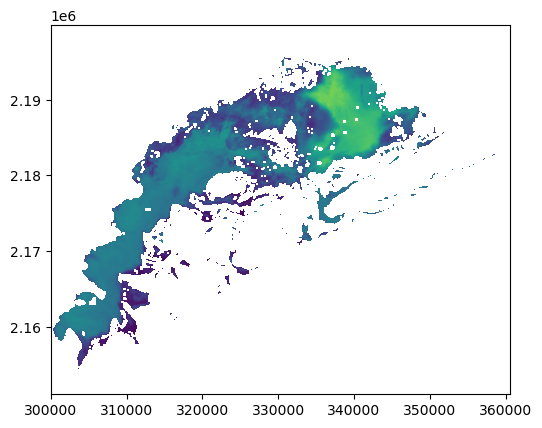

F://feb_2_2019\Rrs492.tif


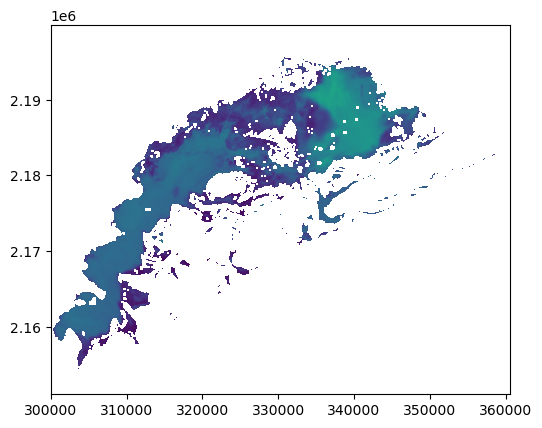

F://feb_2_2019\Rrs559.tif


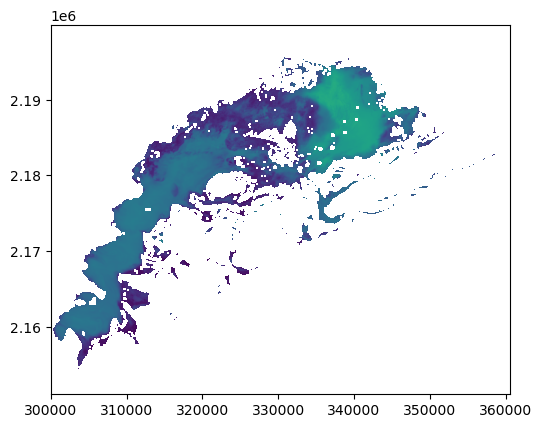

F://feb_2_2019\Rrs665.tif


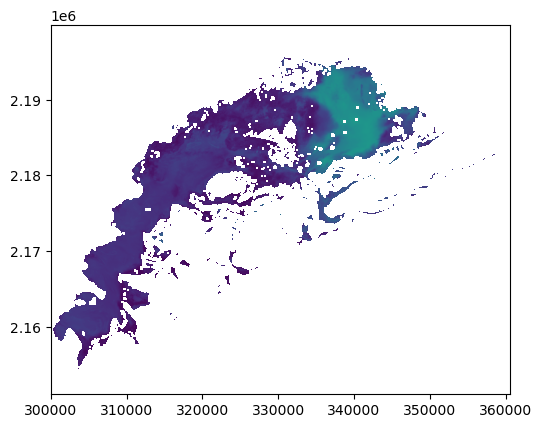

F://feb_2_2019\Rrs704.tif


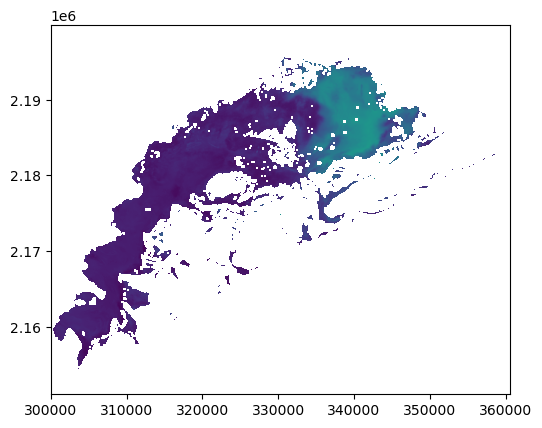

F://feb_2_2019\Rrs739.tif


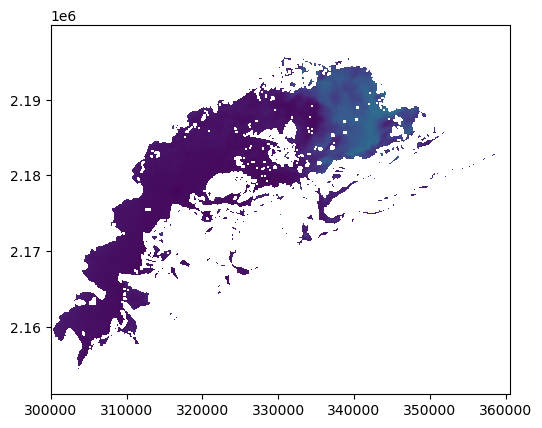

F://feb_2_2019\Rrs780.tif


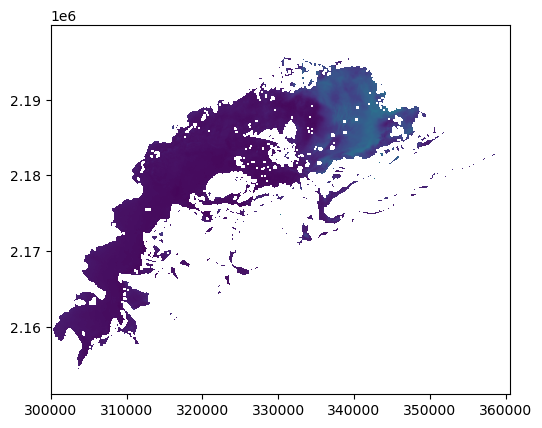

In [9]:
##Reading and plotting all Rrs band tif images
for i in Rrs_list:
    print(i)
    img=rasterio.open(i)
    show(img)

In [40]:
print(Rrs)
for i in Rrs:
    print(i)

[<open DatasetReader name='F:/feb_2_2019/Rrs442.tif' mode='r'>, <open DatasetReader name='F:/feb_2_2019/Rrs492.tif' mode='r'>, <open DatasetReader name='F:/feb_2_2019/Rrs559.tif' mode='r'>, <open DatasetReader name='F:/feb_2_2019/Rrs665.tif' mode='r'>, <open DatasetReader name='F:/feb_2_2019/Rrs704.tif' mode='r'>, <open DatasetReader name='F:/feb_2_2019/Rrs739.tif' mode='r'>, <open DatasetReader name='F:/feb_2_2019/Rrs780.tif' mode='r'>]
<open DatasetReader name='F:/feb_2_2019/Rrs442.tif' mode='r'>
<open DatasetReader name='F:/feb_2_2019/Rrs492.tif' mode='r'>
<open DatasetReader name='F:/feb_2_2019/Rrs559.tif' mode='r'>
<open DatasetReader name='F:/feb_2_2019/Rrs665.tif' mode='r'>
<open DatasetReader name='F:/feb_2_2019/Rrs704.tif' mode='r'>
<open DatasetReader name='F:/feb_2_2019/Rrs739.tif' mode='r'>
<open DatasetReader name='F:/feb_2_2019/Rrs780.tif' mode='r'>


C:\Users\suchi\.conda\envs\geospatial_env\lib\site-packages\matplotlib\image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)


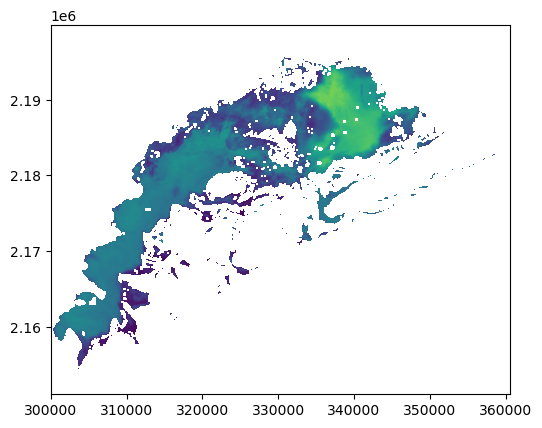

<Axes: >

In [6]:
show(Rrs442)

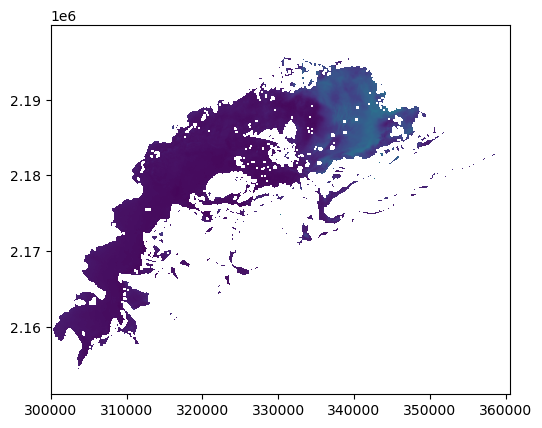

<Axes: >

In [7]:
show(Rrs780)

In [9]:
number_of_bands=Rrs442.count


In [10]:
Rrs442.crs

CRS.from_epsg(32645)

In [11]:
print(number_of_bands)

1


In [13]:
#Reading a csv file of point location and converting into point shape file
import pandas as pd
pt_data=pd.read_csv("F:\points_data.csv")
Final_pt_data=pd.read_csv("F:\Final_points_data.csv")

In [14]:
Final_pt_data.head()

,StationID,Date,Time,Lat,Long
0,FC3FF1,03-02-2019,10:22,19.720390,85.379569
1,FC3FF2,03-02-2019,12:06,19.733056,85.342500
2,FC3FF3,03-02-2019,13:30,19.728333,85.315833
3,FC3FF4,03-02-2019,14:35,19.734167,85.286389
4,FC3FF5,03-02-2019,15:16,19.735556,85.270278


In [15]:
Final_pt_data.columns

Index(['StationID', 'Date', 'Time', 'Lat', 'Long'], dtype='object')

In [16]:
Final_pt_data.shape

(65, 5)

In [18]:
# Converting csv to shape file
import geopandas as gpd
pt_data_shp=gpd.GeoDataFrame(Final_pt_data,crs='EPSG:4326', geometry=gpd.points_from_xy(Final_pt_data['Long'],Final_pt_data['Lat']))
pt_data_shp.head()

,StationID,Date,Time,Lat,Long,geometry
0,FC3FF1,03-02-2019,10:22,19.720390,85.379569,POINT (85.37957 19.72039)
1,FC3FF2,03-02-2019,12:06,19.733056,85.342500,POINT (85.34250 19.73306)
2,FC3FF3,03-02-2019,13:30,19.728333,85.315833,POINT (85.31583 19.72833)
3,FC3FF4,03-02-2019,14:35,19.734167,85.286389,POINT (85.28639 19.73417)
4,FC3FF5,03-02-2019,15:16,19.735556,85.270278,POINT (85.27028 19.73556)


In [19]:
pt_data_shp

,StationID,Date,Time,Lat,Long,geometry
0,FC3FF1,03-02-2019,10:22,19.720390,85.379569,POINT (85.37957 19.72039)
1,FC3FF2,03-02-2019,12:06,19.733056,85.342500,POINT (85.34250 19.73306)
2,FC3FF3,03-02-2019,13:30,19.728333,85.315833,POINT (85.31583 19.72833)
3,FC3FF4,03-02-2019,14:35,19.734167,85.286389,POINT (85.28639 19.73417)
4,FC3FF5,03-02-2019,15:16,19.735556,85.270278,POINT (85.27028 19.73556)
...,...,...,...,...,...,...
60,FC3GT32,07-02-2019,15:25,19.779444,85.438167,POINT (85.43817 19.77944)
61,FC3GT33,07-02-2019,15:41,19.760556,85.435556,POINT (85.43556 19.76056)
62,FC3GT34,08-02-2019,12:18,19.707222,85.258056,POINT (85.25806 19.70722)
63,FC3GT35,08-02-2019,12:56,19.687500,85.240278,POINT (85.24028 19.68750)


In [20]:
## Saving the shape file
#####Tip: Always create a folder to save the shape files as it includes many files
pt_data_shp.to_file('F:\python_outputs\pt_data_shp.shp')

In [21]:
#Reading the existing shape file
pointData=gpd.read_file(r"F:\python_outputs\pt_data_shp.shp")
# To know its coordinate refernce system
print("CRS:", pointData.crs)
pointData.crs ##Detailed information

CRS: EPSG:4326


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

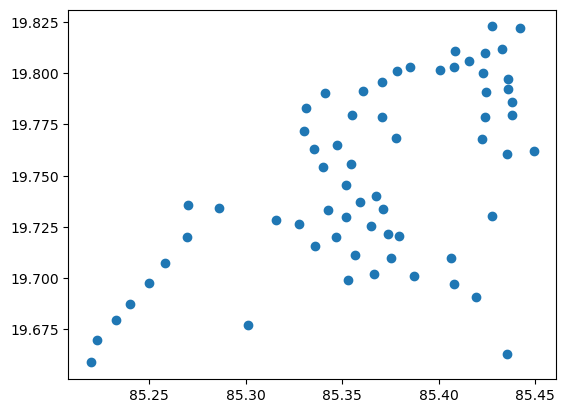

In [22]:
pointData.plot()

<Axes: >

C:\Users\suchi\.conda\envs\geospatial_env\lib\site-packages\matplotlib\image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)


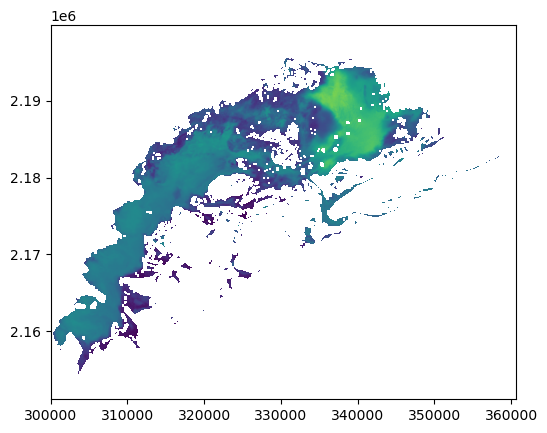

In [24]:
# Showing points on raster file
fig,ax=plt.subplots(figsize=(6,6))
pointData.plot(ax=ax,color="red")
show(Rrs442, ax=ax)
##Here the datapoints are not overlapped in imge because both have different crs.
#So we need to convert point data crs to image crs

In [25]:
Rrs442.crs

CRS.from_epsg(32645)

In [26]:
pointData.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
#As both datasets are in different crs points are not displayed over map
#Converting one crs to another
#Here converting pointData crs(EPSG:4326) to image crs (epsg(32645))
pointData_new=pointData.to_crs(epsg=32645)
print("pointData crs:",pointData.crs)
print("pointData_new crs:",pointData_new.crs)

pointData crs: EPSG:4326
pointData_new crs: EPSG:32645


<Axes: >

C:\Users\suchi\.conda\envs\geospatial_env\lib\site-packages\matplotlib\image.py:491: RuntimeWarning: overflow encountered in divide
  A_scaled /= ((a_max - a_min) / frac)


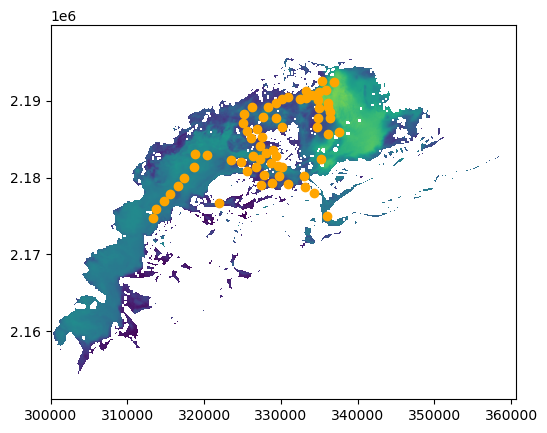

In [30]:
# Showing points on raster file
fig,ax=plt.subplots(figsize=(6,6))
pointData_new.plot(ax=ax,color="orange")
show(Rrs442, ax=ax)

In [31]:
pointData_new.head()

,StationID,Date,Time,Lat,Long,geometry
0,FC3FF1,03-02-2019,10:22,19.720390,85.379569,POINT (330179.558 2181350.612)
1,FC3FF2,03-02-2019,12:06,19.733056,85.342500,POINT (326307.604 2182790.161)
2,FC3FF3,03-02-2019,13:30,19.728333,85.315833,POINT (323507.311 2182294.883)
3,FC3FF4,03-02-2019,14:35,19.734167,85.286389,POINT (320427.534 2182971.578)
4,FC3FF5,03-02-2019,15:16,19.735556,85.270278,POINT (318740.403 2183142.474)


In [39]:
#extract xy from point geometry
for i in pointData_new['geometry']:
    print(i.xy[0][0],i.xy[1][0])

330179.5472328387 2181350.579126404
326307.60363658384 2182790.1121396157
323507.3460346994 2182294.9187297043
320427.52163674857 2182971.541885269
318740.3795036726 2183142.4255017145
328087.7842121766 2183203.3165802676
326068.4450326032 2185129.5246549696
325068.6400963637 2187076.67140726
326253.4581071291 2189156.101667481
328320.7777779207 2189228.2060456546
335243.2416856792 2182428.3086787513
337546.23046319163 2185912.541170215
336179.9720114573 2189276.808904048
334656.72594545584 2191351.202228582
329336.15199214447 2182822.280815682
328935.6479924895 2183564.1433252594
326866.1459616845 2186321.014469726
329344.1655828508 2189710.3314196756
330864.8794587407 2190464.5109036122
333251.23244441947 2190441.8814866636
334946.29340425885 2191194.7501848103
336184.52051767136 2189768.761503719
318664.90300468623 2181451.832321432
316542.7084977316 2178982.653384831
314745.1263004886 2176971.591432001
313685.66069583676 2175937.041646763
313352.3873864922 2174710.4192949566
336850

In [1]:
# Extract point value from raster
rows=[]
cols=[]
image_values=[]
for i in pointData_new['geometry']:
    x=i.xy[0][0]
    y=i.xy[1][0]
    row, col=img.index(x,y)
   # print("Point correspond to row, col: %d %d"%(row,col))
    #print("Raster value on point %0.2f \n"%img.read(1)[row,col])
    #print("Point correspond to row,col:",(row,col))
    img_value=img.read(1)[row,col]
    rows.append(row)
    cols.append(col)
    image_values.append(img_value)
print(rows)
data=[rows, cols,image_values]
df=pd.DataFrame(data,column=('X','Y','Rrs442'))
df  

NameError: name 'pointData_new' is not defined

In [ ]:
   rows.append(row)
cols.append(col)
    data=[rows,cols]
    df=pd.DataFrame(data)
    df.head()

In [94]:
# Extract point value from raster
rows=[]
cols=[]
image_values=[]
Rrs_values=[]
for img in Rrs: 
    for i in pointData_new['geometry']:
        x=i.xy[0][0]
        y=i.xy[1][0]
        row, col=img.index(x,y)
        #print("row and col number:",row,col)
       # print("Point correspond to row, col: %d %d"%(row,col))
        #print("Raster value on point %0.2f \n"%img.read(1)[row,col])
        #print("Point correspond to row,col:",(row,col))
        img_value=img.read(1)[row,col]
        rows.append(row)
        cols.append(col)
        image_values.append(img_value)
    Rrs_values.append(image_values)
    data=[rows, cols,image_values]
    rows=[]
    cols=[]
    image_values=[]
    #print(rows)
    print("#########################")
    
Rrs_data=[rows, cols,Rrs_values]
#print("Rrs_data:",Rrs_data)
#df=pd.DataFrame(data,column=('X','Y','Rrs442'))
#df=pd.DataFrame(Rrs_data)
###Sav
df=pd.DataFrame(Rrs_values, index=('Rrs442','Rrs492','Rrs559','Rrs665','Rrs704','Rrs739','Rrs780'))
print("df:",df)
dft=df.T
print("dft:",dft)
# using dataframe.assign() function
#dft['StationId']=pointData_new['StationID']
#df1=pointData_new[['StationID','Lat','Long','geometry']]
#print("dft:",dft)
#DF=pd.concat([df1,dft])
DF.columns
DF.to_csv(r'F:\df.csv')

#########################
#########################
#########################
#########################
#########################
#########################
#########################
df:               0         1         2         3         4         5         6    
Rrs442  0.022283  0.023400  0.022927  0.021810  0.023357  0.021079  0.015943  \
Rrs492  0.027124  0.027323  0.026845  0.025528  0.028677  0.022891  0.016150   
Rrs559  0.033383  0.034678  0.034482  0.031538  0.034168  0.027014  0.017334   
Rrs665  0.021439  0.021475  0.020462  0.017890  0.020426  0.017020  0.012412   
Rrs704  0.016644  0.016391  0.016029  0.013352  0.015125  0.015486  0.013026   
Rrs739  0.009214  0.008640  0.008856  0.008282  0.008856  0.008138  0.008892   
Rrs780  0.008403  0.008265  0.008128  0.007510  0.007854  0.007545  0.008471   

              7         8         9   ...        55        56        57   
Rrs442  0.016636  0.016506  0.019054  ...  0.017154  0.019486  0.026141  \
Rrs492  0.016472  0.017

In [87]:

DF.to_csv("F:\\feb_2_2019_Rrs.csv")
# writing to Excel
datatoexcel = pd.ExcelWriter('F:/feb_2_2019_Rrs.xlsx')

# write DataFrame to excel
DF.to_excel(datatoexcel)
  
# save the excel
DF.save()
print('DataFrame is written to Excel File successfully.')

ModuleNotFoundError: No module named 'openpyxl'

In [89]:
DF.tail()

,StationID,Lat,Long,geometry,Rrs442,Rrs492,Rrs559,Rrs665,Rrs704,Rrs739,Rrs780
60,NaN,NaN,NaN,None,0.019098,0.020729,0.035501,0.023284,0.033195,0.017850,0.017179
61,NaN,NaN,NaN,None,0.020735,0.024011,0.036833,0.024803,0.030532,0.015165,0.014233
62,NaN,NaN,NaN,None,0.022670,0.027164,0.034443,0.018651,0.013750,0.007707,0.007545
63,NaN,NaN,NaN,None,0.021681,0.026606,0.035344,0.018071,0.013352,0.007707,0.007922
64,NaN,NaN,NaN,None,0.019184,0.022651,0.027329,0.017817,0.014039,0.008676,0.008403
